# Simple population - calls correlation analysis

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
import pandas as pd
import numpy as np

In [9]:
# Load the prepared data
cities = ['Den Haag', 'Rotterdam', 'Amsterdam']
resolution = '1000'
id_column = f'c28992r{resolution}'
time_step = 1
weekday_grids = {}

for city in cities:
    weekday_grid = pd.read_csv(
            f"../data/processed/p2000/{city}/spatiotemporal_grid_time_step={time_step}.csv")
    weekday_grid.drop(columns=["geometry"],inplace=True)
    weekday_grids[city] = weekday_grid

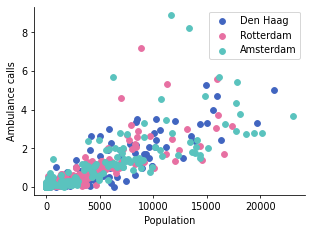

In [10]:
# Make a scatter plot
fig, ax = plt.subplots(figsize=(5, 3.5))
d = {'Den Haag' : '#4165c0',  'Rotterdam' : '#e770a2',  'Amsterdam' : '#5ac3be'}
l = []
ratio = []
for city, color in d.items():
    x = weekday_grids[city]['aantal_inwoners']
    y = weekday_grids[city]['Total']
    l.append([x, y])
    ratio.append(y/(x/10000))
    ax.scatter(x, y, color=color, label=city)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Population')
ax.set_ylabel('Ambulance calls')
ax.legend();

In [11]:
# Calculate the ratio of ambulance calls per 10,000 inhabitants
cities = ['Den Haag', 'Rotterdam', 'Amsterdam']
calls_per_capita = []
for city in cities:
    df = weekday_grids[city].copy()
    df.set_index(id_column, inplace=True)
    x = df['aantal_inwoners']
    y = df['Total']
    print(f'Number of calls per 10,000 {city} inhabitants:', round(y.sum()/(x.sum()/10000), 2))
    calls_per_capita.append(y/(x/10000))
calls_per_capita = pd.concat(calls_per_capita, axis=0)
calls_per_capita.replace([np.inf, -np.inf], np.nan, inplace=True)
calls_per_capita.fillna(0, inplace=True)

Number of calls per 10,000 Den Haag inhabitants: 2.12
Number of calls per 10,000 Rotterdam inhabitants: 2.22
Number of calls per 10,000 Amsterdam inhabitants: 2.18


In [12]:
calls_per_capita.describe()

count    465.000000
mean       4.303665
std       12.662668
min        0.000000
25%        1.078749
50%        1.813865
75%        3.133903
max      157.264957
dtype: float64

In [13]:
cities = ['Den Haag', 'Rotterdam', 'Amsterdam']
l = []
for city in cities:
    x = weekday_grids[city]['aantal_inwoners']
    y = weekday_grids[city]['Total']
    print(city)
    print('Spearman corr:', spearmanr(x, y)[0])
    print('Kendall corr:', kendalltau(x, y)[0])
    print()

Den Haag
Spearman corr: 0.8249101631893871
Kendall corr: 0.6368209876154016

Rotterdam
Spearman corr: 0.9026463249895198
Kendall corr: 0.7268785049965646

Amsterdam
Spearman corr: 0.8988835652044328
Kendall corr: 0.7143049317130781

